In [1]:
!pip install -q kaggle
!mkdir ~/.kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! cp "/content/drive/MyDrive/Colab Notebooks/Thesis/kaggle.json"  ~/.kaggle

In [ ]:
! kaggle datasets download -d apollo2506/eurosat-dataset
! cp "/content/eurosat-dataset.zip" "/content/drive/MyDrive/Colab Notebooks/Thesis"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
cp: cannot stat '/content/eurosat-dataset.zip': No such file or directory


In [6]:
# Download the UC Merced Land Use Dataset
! kaggle datasets download -d apollo2506/landuse-scene-classification
! cp "/content/landuse-scene-classification.zip" "/content/drive/MyDrive/Colab Notebooks/Thesis"

 99% 1.97G/1.98G [00:23<00:00, 89.0MB/s]
100% 1.98G/1.98G [00:23<00:00, 91.5MB/s]


In [2]:
! unzip -q "/content/drive/MyDrive/Colab Notebooks/Thesis/eurosat-dataset.zip"
! unzip -q "/content/drive/MyDrive/Colab Notebooks/Thesis/landuse-scene-classification.zip"
! unzip -q "/content/drive/MyDrive/Colab Notebooks/Thesis/NWPU-RESISC45.zip"

In [ ]:
# ! unzip -q "/content/drive/MyDrive/Colab Notebooks/Thesis/eurosat-dataset.zip" -d "/content/drive/MyDrive/Colab Notebooks/Thesis/eurosat-unzipped"
# ! unzip -q "/content/drive/MyDrive/Colab Notebooks/Thesis/landuse-scene-classification.zip" -d "/content/drive/MyDrive/Colab Notebooks/Thesis/ucmerced-unzipped"

In [ ]:
# eurosat_datasets_dir = "/content/drive/MyDrive/Colab Notebooks/Thesis/eurosat-unzipped/EuroSAT"
# ucmerced_datasets_dir = "/content/drive/MyDrive/Colab Notebooks/Thesis/ucmerced-unzipped/images"

In [3]:
eurosat_datasets_dir = "/content/EuroSAT"
ucmerced_datasets_dir = "/content/images"
resisc_datasets_dir = "/content/NWPU-RESISC45/NWPU-RESISC45"

In [4]:
datasets_dir = "/content/EuroSAT"

In [5]:
import os
import shutil

# Define the paths to the original datasets
ucmerced_original_dir = "/content/images"
resisc_original_dir = "/content/NWPU-RESISC45/NWPU-RESISC45"

# Define the destination directories
eurosat_dest_dir = "/content/EuroSAT"

# Move UC Merced Land Use dataset classes
ucmerced_classes = os.listdir(ucmerced_original_dir)
for class_name in ucmerced_classes:
    dest_class_name = f"ucmerced_{class_name}"
    class_path = os.path.join(ucmerced_original_dir, class_name)
    dest_path = os.path.join(eurosat_dest_dir, dest_class_name)
    shutil.move(class_path, dest_path)

# Move NWPU-RESISC45 dataset classes
resisc_classes = os.listdir(resisc_original_dir)
for class_name in resisc_classes:
    dest_class_name = f"resisc_{class_name}"
    class_path = os.path.join(resisc_original_dir, class_name)
    dest_path = os.path.join(eurosat_dest_dir, dest_class_name)
    shutil.move(class_path, dest_path)


In [6]:
IMG_SIZE = 128
BATCH_SIZE = 32
epochs = 30

In [7]:
import tensorflow as tf
tf.random.set_seed(42)

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = datasets_dir,
    image_size = (IMG_SIZE, IMG_SIZE),
    label_mode = 'categorical',
    color_mode="rgb",
    batch_size = BATCH_SIZE,
    seed=42,
    shuffle = True,
    validation_split=0.2,
    subset="training"

).prefetch(buffer_size=tf.data.AUTOTUNE)


test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = datasets_dir,
    image_size =  (IMG_SIZE, IMG_SIZE),
    label_mode = 'categorical',
    color_mode="rgb",
    batch_size = BATCH_SIZE,
    seed=42,
    shuffle = True,
    validation_split=0.2,
    subset="validation"

)
class_names = test_dataset.class_names
test_data = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
# test_data = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
class_names
# # Get class names from EuroSAT dataset
# #eurosat_class_names = eurosat_test_dataset.class_names

# #Load UC Merced Land Use dataset
# ucmerced_train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     directory=ucmerced_datasets_dir,
#     image_size=(IMG_SIZE, IMG_SIZE),
#     label_mode='categorical',
#     color_mode="rgb",
#     batch_size=BATCH_SIZE,
#     seed=42,
#     shuffle=True,
#     validation_split=0.2,
#     subset="training"
# ).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# ucmerced_test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     directory=ucmerced_datasets_dir,
#     image_size=(IMG_SIZE, IMG_SIZE),
#     label_mode='categorical',
#     color_mode="rgb",
#     batch_size=BATCH_SIZE,
#     seed=42,
#     shuffle=True,
#     validation_split=0.2,
#     subset="validation"
# )
# # Get class names from UC Merced Land Use dataset
# #ucmerced_class_names = ucmerced_test_dataset.class_names

# # Load NWPU-RESISC45 dataset
# resisc_train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     directory=resisc_datasets_dir,
#     image_size=(IMG_SIZE, IMG_SIZE),
#     label_mode='categorical',
#     color_mode="rgb",
#     batch_size=BATCH_SIZE,
#     seed=42,
#     shuffle=True,
#     validation_split=0.2,
#     subset="training"
# ).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# resisc_test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     directory=resisc_datasets_dir,
#     image_size=(IMG_SIZE, IMG_SIZE),
#     label_mode='categorical',
#     color_mode="rgb",
#     batch_size=BATCH_SIZE,
#     seed=42,
#     shuffle=True,
#     validation_split=0.2,
#     subset="validation"
# )
# # Get class names from NWPU-RESISC45 dataset
# #resisc_class_names = resisc_test_dataset.class_names

# # Renaming classes in the EuroSAT dataset
# eurosat_class_names = [f"eurosat_{class_name}" for class_name in eurosat_test_dataset.class_names]

# # Renaming classes in the UC Merced Land Use dataset
# ucmerced_class_names = [f"ucmerced_{class_name}" for class_name in ucmerced_test_dataset.class_names]

# # Renaming classes in the NWPU-RESISC45 dataset
# resisc_class_names = [f"resisc_{class_name}" for class_name in resisc_test_dataset.class_names]


# # Combine all datasets
# train_data = eurosat_train_dataset.concatenate(ucmerced_train_dataset).concatenate(resisc_train_dataset)
# test_data = eurosat_test_dataset.concatenate(ucmerced_test_dataset).concatenate(resisc_test_dataset)

# # # Combine both datasets
# # train_data = eurosat_train_dataset.concatenate(ucmerced_train_dataset)
# # test_dataset = eurosat_test_dataset.concatenate(ucmerced_test_dataset)

# # Combine all class names
# class_names_set = set(eurosat_class_names + ucmerced_class_names + resisc_class_names)

# # Sort class names based on their order in the combined training dataset
# class_names = sorted(class_names_set)
# class_names

# # Combine all class names
# class_names = list(set(eurosat_class_names + ucmerced_class_names))
# class_names

Found 69000 files belonging to 76 classes.
Using 55200 files for training.
Found 69000 files belonging to 76 classes.
Using 13800 files for validation.


['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake',
 'resisc_airplane',
 'resisc_airport',
 'resisc_baseball_diamond',
 'resisc_basketball_court',
 'resisc_beach',
 'resisc_bridge',
 'resisc_chaparral',
 'resisc_church',
 'resisc_circular_farmland',
 'resisc_cloud',
 'resisc_commercial_area',
 'resisc_dense_residential',
 'resisc_desert',
 'resisc_forest',
 'resisc_freeway',
 'resisc_golf_course',
 'resisc_ground_track_field',
 'resisc_harbor',
 'resisc_industrial_area',
 'resisc_intersection',
 'resisc_island',
 'resisc_lake',
 'resisc_meadow',
 'resisc_medium_residential',
 'resisc_mobile_home_park',
 'resisc_mountain',
 'resisc_overpass',
 'resisc_palace',
 'resisc_parking_lot',
 'resisc_railway',
 'resisc_railway_station',
 'resisc_rectangular_farmland',
 'resisc_river',
 'resisc_roundabout',
 'resisc_runway',
 'resisc_sea_ice',
 'resisc_ship',
 'resisc_snowberg',
 'resisc_sparse_residenti

In [8]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2)
], name ="data_augmentation")

In [ ]:
# Define the random_brightness function
# def random_brightness(image):
#     return tf.image.random_brightness(image, max_delta=0.3)

In [ ]:

# import tensorflow as tf

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(IMG_SIZE, IMG_SIZE, 3)),
#     tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
#     tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
#     tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
#     tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
#     tf.keras.layers.experimental.preprocessing.RandomContrast(0.2),
#     tf.keras.layers.Lambda(random_brightness)
# ], name="data_augmentation")


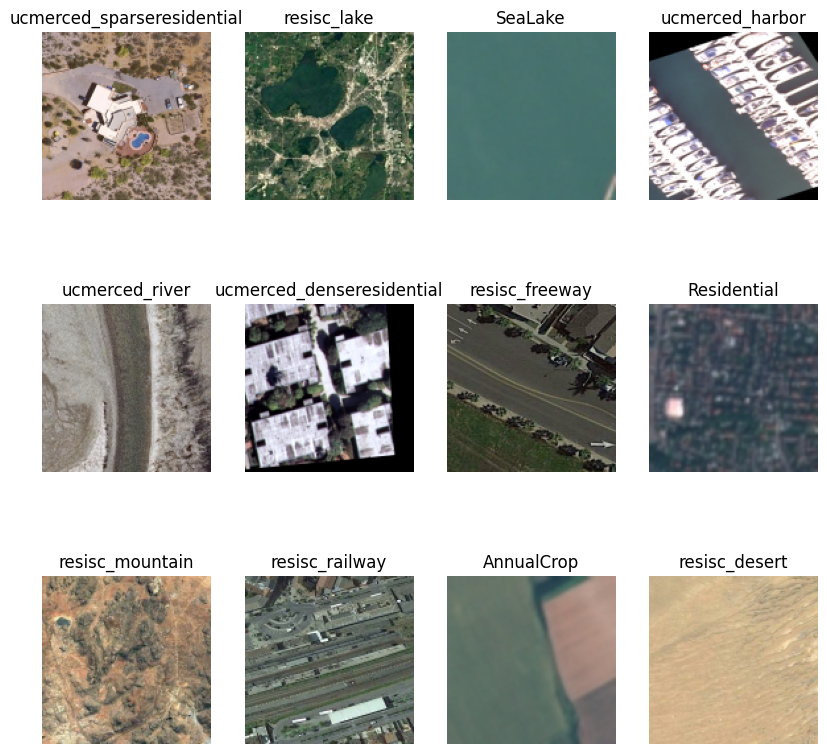

In [9]:
import matplotlib.pyplot as plt
import numpy as np

"""
ploting image
"""

plt.figure(figsize=(10,10))
"""
Take only one batch
Each batch size is now 32
so Every batch has 32 images
"""
for image_batch,label_batch in train_data.take(1):
    """Ploting only 8 pictures of them"""
    for i in range(0,12):
        """Subploting them 3 rows and 4 columns"""
        plt.subplot(3,4,i+1)
        """Image data 0-255"""
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[np.argmax(label_batch[i])])
        plt.axis("off")

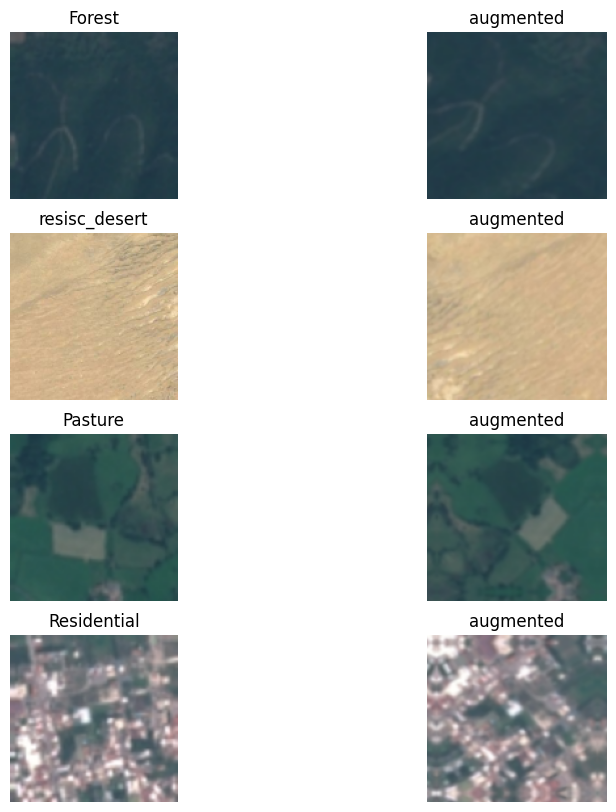

In [10]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in train_data.take(1):
    augmented_image_batch = data_augmentation(image_batch)
    image_plt_len = len(image_batch) if len(image_batch) < 4 else 4
    for i in range(0, image_plt_len):
        plt.subplot(image_plt_len,2,2*i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[np.argmax(label_batch[i])])
        plt.axis("off")
        plt.subplot(image_plt_len,2,2*i+2)
        img = augmented_image_batch[i]
        img = np.array(img, dtype=np.int32)
        plt.imshow(img)
        plt.title(f"augmented")
        plt.axis("off")

In [11]:
gdrive_path = "/content/drive/MyDrive/Colab Notebooks/Thesis"

In [12]:
checkpoint_path =f"{gdrive_path}/CheckPoint/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True
)

In [ ]:
# import tensorflow as tf

# # Setup the base model and freeze its layers (this will extract features)
# base_model = tf.keras.applications.EfficientNetB0(include_top=False)
# #base_model = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet') #(later) Accuracy 80%
# #base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet') #(later) Accuracy 94%
# # base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet') #(later)
# base_model.trainable= False

# #Setup model architecture with trainable top layers
# inputs = tf.keras.layers.Input(shape=(IMG_SIZE,IMG_SIZE,3), name='input_layer')
# x = data_augmentation(inputs)
# x = base_model(x, training=False)
# x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)
# x = tf.keras.layers.Dropout(0.5)(x)  # Add dropout for regularization (Later)
# outputs = tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)
# model = tf.keras.Model(inputs, outputs)

In [ ]:
# import tensorflow as tf

# model = tf.keras.Sequential([
#     data_augmentation,





#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=2),
#     tf.keras.layers.Conv2D(16, 3, activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=2),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=2),




#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layers')

# ])

In [31]:
print("Number of classes:", len(class_names))
print("Class names:", class_names)

for images, labels in train_data.take(1):
    print("Labels shape:", labels.shape)

Number of classes: 76
Class names: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake', 'resisc_airplane', 'resisc_airport', 'resisc_baseball_diamond', 'resisc_basketball_court', 'resisc_beach', 'resisc_bridge', 'resisc_chaparral', 'resisc_church', 'resisc_circular_farmland', 'resisc_cloud', 'resisc_commercial_area', 'resisc_dense_residential', 'resisc_desert', 'resisc_forest', 'resisc_freeway', 'resisc_golf_course', 'resisc_ground_track_field', 'resisc_harbor', 'resisc_industrial_area', 'resisc_intersection', 'resisc_island', 'resisc_lake', 'resisc_meadow', 'resisc_medium_residential', 'resisc_mobile_home_park', 'resisc_mountain', 'resisc_overpass', 'resisc_palace', 'resisc_parking_lot', 'resisc_railway', 'resisc_railway_station', 'resisc_rectangular_farmland', 'resisc_river', 'resisc_roundabout', 'resisc_runway', 'resisc_sea_ice', 'resisc_ship', 'resisc_snowberg', 'resisc_sparse_residential', 'resisc_

In [14]:
import tensorflow as tf

# Setup the base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True  # Enable fine-tuning

# Fine-tune only the last N layers
fine_tune_at = 100
for layer in base_model.layers[:-fine_tune_at]:
    layer.trainable = False

# Setup model architecture with trainable top layers
inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name='input_layer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Add dropout for regularization
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    # optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adjust the learning rate
    optimizer=tf.keras.optimizers.Adam(),  # Adjust the learning rate
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)
model.summary()

# Train the model
history = model.fit(
    train_data,
    epochs=epochs,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[early_stopping]
)

# Evaluate the model
model.evaluate(train_data), model.evaluate(test_data)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pooling_layer (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                           

([0.18959690630435944, 0.9453079700469971],
 [0.2866348624229431, 0.9228261113166809])

After sir instructed on 4th dec. Adding a Hybrid model

In [ ]:
import tensorflow as tf

# Setup the base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True  # Enable fine-tuning

# Fine-tune only the last N layers
fine_tune_at = 100
for layer in base_model.layers[:-fine_tune_at]:
    layer.trainable = False

# Setup model architecture with trainable top layers
inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name='input_layer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Add dropout for regularization
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)
model = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pooling_layer (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_10 (Dropout)        (None, 1280)              0         
                                                           

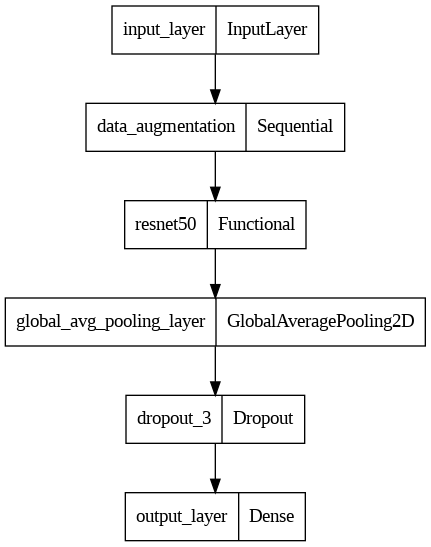

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    # show_shapes=True,
    # show_dtype=False,
    # show_layer_names=True,
    # rankdir='TB',
    # expand_nested=False,
    dpi=96,
    # layer_range=None,
    # show_layer_activations=False,
    # show_trainable=False
)

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_data,
    epochs=epochs,
    steps_per_epoch=len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        checkpoint_callback
    ]
)

Epoch 1/30


InvalidArgumentError: ignored

In [ ]:
# Evaluate the model on both training and testing sets
train_evaluation = model.evaluate(train_data)
test_evaluation = model.evaluate(test_data)

print("Training Accuracy:", train_evaluation[1])
print("Testing Accuracy:", test_evaluation[1])


169/169 [==============================] - 5s 30ms/step - loss: 0.1004 - accuracy: 0.9707
Training Accuracy: 0.9832407236099243
Testing Accuracy: 0.9707407355308533


In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure(figsize=(12,6))
  # Plot loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [ ]:
plot_loss_curves(history)

In [ ]:
model.evaluate(train_data), model.evaluate(test_data)

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with
  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels,
         )

  # Make x-axis labels appear on bottom
  ax.tick_params(axis='x', labelrotation=90)
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [ ]:
y_true = np.array([])
y_pred = np.array([])
for x, y in test_data:
    y_true = np.concatenate([y_true, np.argmax(y, axis=-1)], axis=0)
    y_pred = np.concatenate([y_pred, np.argmax(model.predict(x), axis=-1)], axis=0)


In [ ]:
make_confusion_matrix(y_true, y_pred, class_names)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,12))
for image_batch,label_batch in test_data.take(1):
    predictions = model.predict(image_batch)
    predictions = np.argmax(predictions, axis=-1)
    for i in range(0,len(predictions) if len(predictions)<12 else 12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        true_class = class_names[np.argmax(label_batch[i])]
        predict_class = class_names[predictions[i]]
        title = f"""True: {true_class}\n Predict: {predict_class}"""
        plt.title(title, color='g' if true_class==predict_class else 'r')
        plt.axis("off")